In [8]:
import gzip
from collections import defaultdict
import math
import string
import random
import string

In [9]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        try:
            yield eval(l)
        except:
            continue

In [10]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = int(r)
        yield u,b,r

In [11]:
runway = []
for d in readGz("renttherunway_final_data.json.gz"):
    runway.append(d)

In [32]:
runway[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

In [13]:
mod = []
for d in readGz("modcloth_final_data.json.gz"):
    mod.append(d)

In [14]:
mod[0]

{'item_id': '123373',
 'waist': '29',
 'size': 7,
 'quality': 5,
 'cup size': 'd',
 'hips': '38',
 'bra size': '34',
 'category': 'new',
 'bust': '36',
 'height': '5ft 6in',
 'user_name': 'Emily',
 'length': 'just right',
 'fit': 'small',
 'user_id': '991571'}

# Exploratory Analysis

## 1. Data Overview
The dataset contains 192,462 entries with 15 columns. Here's a brief description of each column:

fit: Describes how well the item fit the user. <br>
user_id: Unique identifier for the user. <br>
bust size: The bust size of the user. <br>
item_id: Unique identifier for the item. <br>
weight: Weight of the user. <br>
rating: Rating given by the user. <br>
rented for: The occasion for which the item was rented. <br>
review_text: Text of the review given by the user. <br>
body type: Body type of the user. <br>
review_summary: Summary of the review. <br>
category: Category of the item. <br>
height: Height of the user. <br>
size: Size of the item. <br>
age: Age of the user. <br>
review_date: Date of the review. <br>

User Demographics: The dataset predominantly features a younger female audience (based on the nature of the rental items and sizes). This is evident from the age and body measurements.<br>
Ratings: High ratings suggest customer satisfaction. However, the lack of low ratings could also indicate a bias in which users choose to leave reviews.<br>
Size and Fit: The wide range of sizes and the 'fit' variable indicate that the service caters to a diverse body size demographic.<br>
Data Quality: The presence of missing values and outliers (like age being 0 or 117) suggests the need for careful data cleaning, especially if this data is to be used for predictive modeling.<br>

## 2. Data Cleaning

Data Cleaning Summary
After converting data types:

Missing Values:

Bust Size: 18,397 missing values. <br>
Weight: 29,957 missing values. <br>
Body Type: 14,637 missing values. <br>
Height: 677 missing values. <br>
Age: 959 missing values. <br>
Rented For: 10 missing values. <br>
Data Type Conversion: <br>

Age and Rating are now numeric. <br>
Height is converted to inches and is numeric. <br>
Weight is converted to pounds and is numeric. <br>

In [21]:
import pandas as pd
runway_df = pd.DataFrame(runway)

In [19]:
runway_df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


In [20]:
runway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192462 entries, 0 to 192461
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192462 non-null  object
 1   user_id         192462 non-null  object
 2   bust size       174065 non-null  object
 3   item_id         192462 non-null  object
 4   weight          162505 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192452 non-null  object
 7   review_text     192462 non-null  object
 8   body type       177825 non-null  object
 9   review_summary  192462 non-null  object
 10  category        192462 non-null  object
 11  height          191785 non-null  object
 12  size            192462 non-null  int64 
 13  age             191503 non-null  object
 14  review_date     192462 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


In [22]:
missing_values = runway_df.isnull().sum()
missing_values

fit                   0
user_id               0
bust size         18397
item_id               0
weight            29957
rating                0
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

In [23]:
runway_df['age'] = pd.to_numeric(runway_df['age'], errors='coerce')
runway_df['rating'] = pd.to_numeric(runway_df['rating'], errors='coerce')

# Converting 'height' to a numeric value (in inches)
def height_to_inches(height_str):
    if type(height_str) == str:
        height_parts = height_str.split("' ")
        feet = int(height_parts[0])
        inches = int(height_parts[1].replace('"',''))
        return (feet * 12) + inches
    else:
        return None

runway_df['height'] = runway_df['height'].apply(height_to_inches)

# Converting 'weight' to numeric (removing 'lbs')
runway_df['weight'] = runway_df['weight'].str.replace('lbs', '').astype(float)

## 3. Descriptive Statistics

Include this dataframe in report

In [25]:
descriptive_stats = runway_df.describe()
descriptive_stats

,weight,rating,height,size,age
count,162505.000000,192462.000000,191785.000000,192462.000000,191503.000000
mean,137.393649,9.092371,65.310707,12.245254,33.869955
std,21.901410,1.430044,2.663612,8.495463,8.057671
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,123.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,148.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


## 4. Data Visualization

Visualization Analysis: <br>
Age Distribution:

The majority of users are in their late 20s to early 40s.<br>
The distribution is slightly right-skewed, indicating a younger user base.


Rating Distribution:

Ratings are predominantly high, mostly around 10.<br>
This suggests overall customer satisfaction.


Height Distribution:

The height of users seems normally distributed.<br>
Most users are around 63 to 67 inches tall (about 5'3" to 5'7").


Weight Distribution:

The weight distribution is roughly normal but slightly right-skewed. <br>
Most users weigh between 120 and 150 lbs.

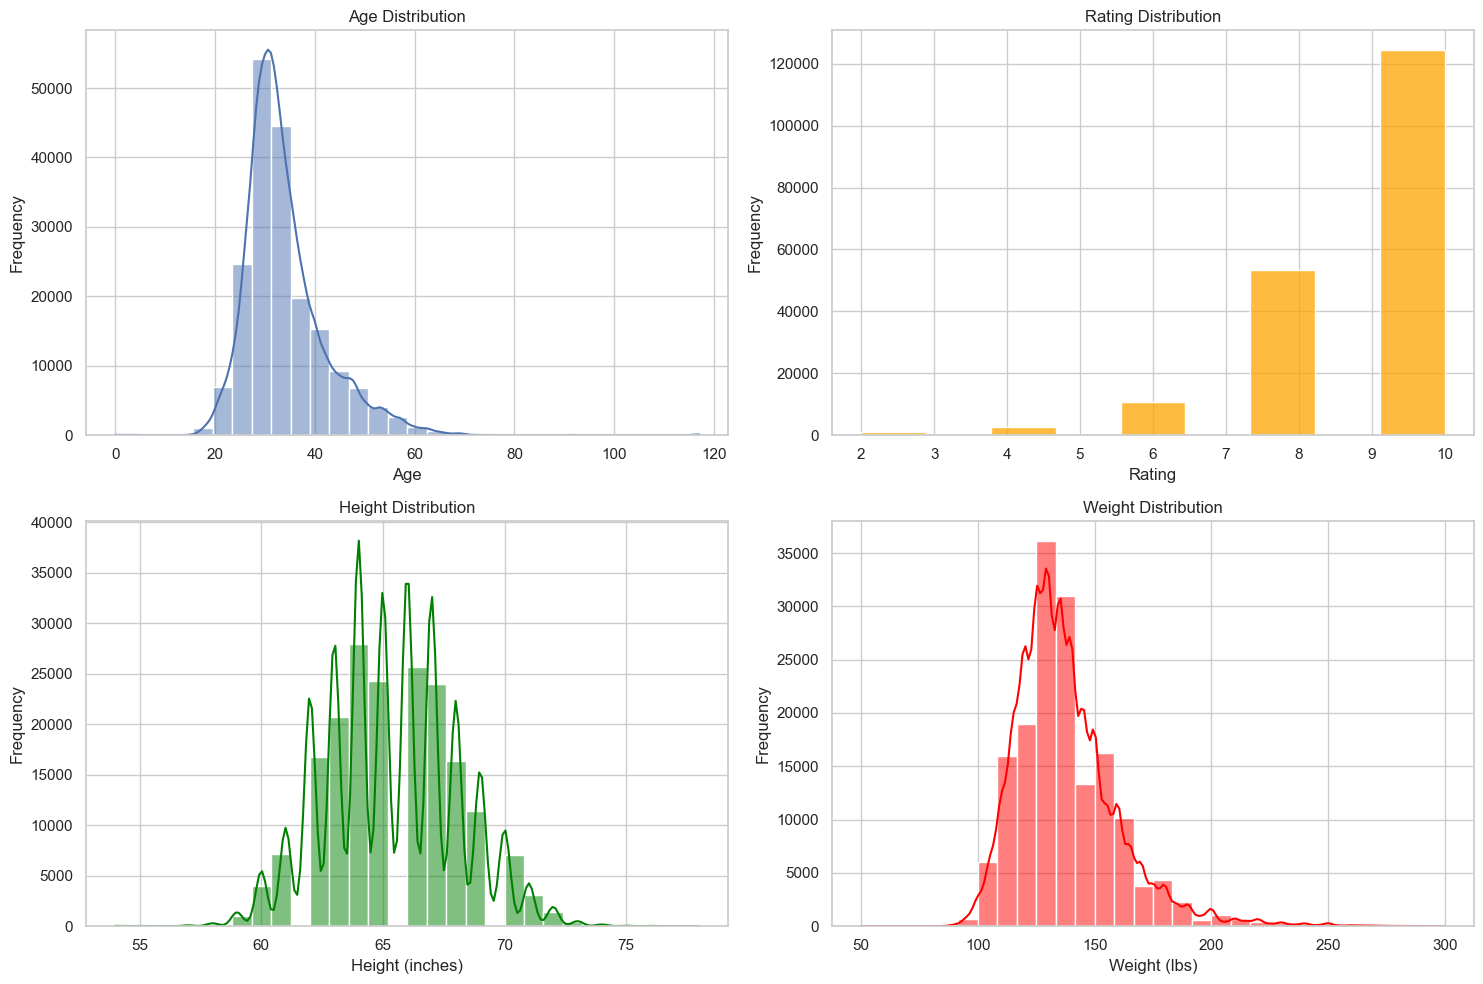

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for Age, Rating, Height, and Weight
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Age Histogram
sns.histplot(runway_df['age'], bins=30, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Rating Histogram
sns.histplot(runway_df['rating'], bins=9, ax=axs[0, 1], kde=False, color='orange')
axs[0, 1].set_title('Rating Distribution')
axs[0, 1].set_xlabel('Rating')
axs[0, 1].set_ylabel('Frequency')

# Height Histogram
sns.histplot(runway_df['height'].dropna(), bins=30, ax=axs[1, 0], kde=True, color='green')
axs[1, 0].set_title('Height Distribution')
axs[1, 0].set_xlabel('Height (inches)')
axs[1, 0].set_ylabel('Frequency')

# Weight Histogram
sns.histplot(runway_df['weight'].dropna(), bins=30, ax=axs[1, 1], kde=True, color='red')
axs[1, 1].set_title('Weight Distribution')
axs[1, 1].set_xlabel('Weight (lbs)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Fit vs. Size:

This plot shows the distribution of 'fit' across different sizes. <br>
There is a noticeable trend where certain sizes have a higher proportion of 'fit' outcomes, while others have more instances of 'small' or 'large'. This suggests that the fit issue may be more prevalent in specific size ranges.

Fit vs. Rating:

The relationship between fit and rating is evident in this plot. <br>
Ratings tend to be higher when the fit is good. Conversely, when the fit is 'small' or 'large', the ratings appear to decrease, albeit not drastically. This indicates that while fit impacts customer satisfaction, other factors also play a significant role in determining the overall rating.

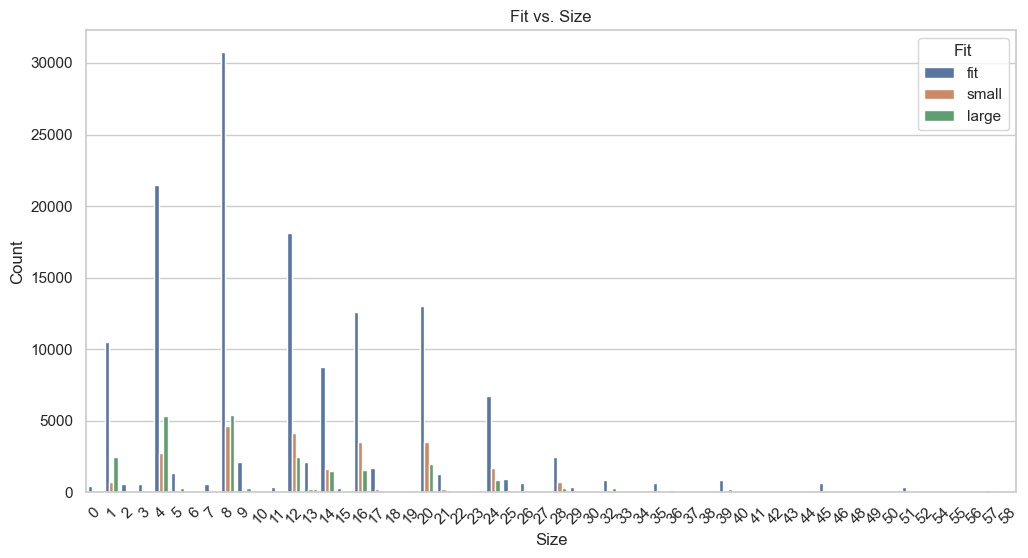

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='size', hue='fit', data=runway_df)
plt.title('Fit vs. Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(title='Fit')
plt.xticks(rotation=45)
plt.show()

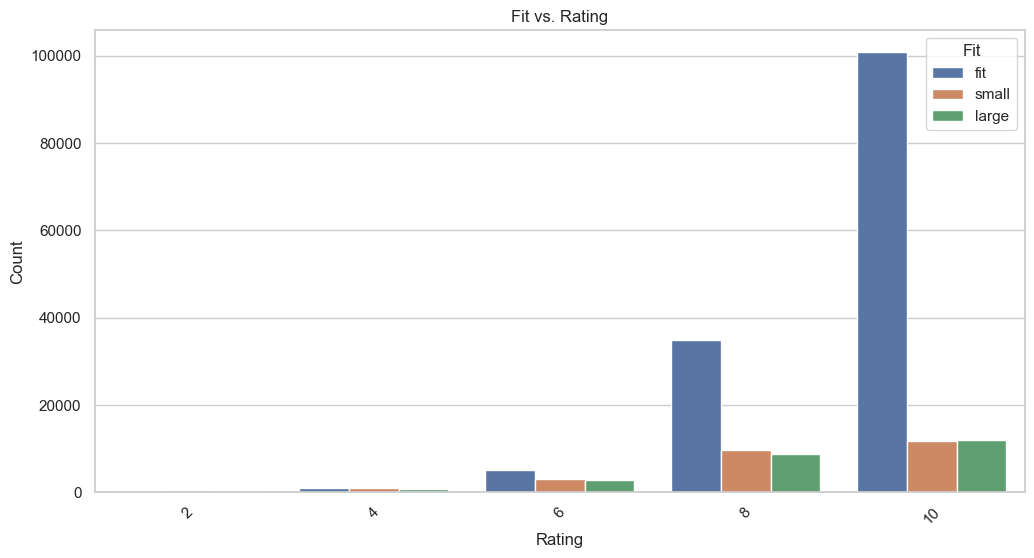

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', hue='fit', data=runway_df)
plt.title('Fit vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Fit')
plt.xticks(rotation=45)
plt.show()

# Predictive Task

**Defining the Predictive Task**

I am setting out to predict the fit of clothing items (categorized as 'small', 'fit', or 'large') for users in the dataset. This is a classification problem where I aim to match users with the right fit based on their attributes and the characteristics of the clothing.

**Baseline Models**

1. Simple Logistic Regression: Using LogisticRegression() from Scikit-Learn with default settings. This model serves as a basic yet often effective benchmark for classification tasks.
2. Another Simple Baseline: I will choose a Naive Bayes classifier as the second baseline, considering its simplicity and effectiveness in classification problems, particularly as a starting point.

**Features to Use** 

I will focus on features that are likely to influence the fit, such as:

1. User-related features: 'age', 'height', 'weight', 'body type'.
2. Clothing-related features: 'size', 'category', 'rented for'.
3. Derived features: For instance, Body Mass Index (BMI) calculated from 'height' and 'weight'.

**Metrics**

To evaluate the performance of the predictive model for clothing fit, the following metrics will be used:

1. **Accuracy**: Measures the overall correctness of the model.
   - Equation: 
     $$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

2. **Precision (for each class 'small', 'fit', 'large')**: Indicates the proportion of positive identifications that were actually correct.
   - Equation: 
     $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

3. **Recall (for each class 'small', 'fit', 'large')**: Measures the proportion of actual positives that were identified correctly.
   - Equation: 
     $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

4. **F1-Score (for each class 'small', 'fit', 'large')**: Provides a balance between Precision and Recall.
   - Equation: 
     $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
     
**Validity Assessment** 

To ensure the validity of my model's predictions, I will:

1. Use Cross-Validation: To evaluate the model's performance across different subsets of the data, ensuring that the model is not overfitting to a particular part of the dataset.

2. Compare with Baseline Models: Evaluate how much better my model performs compared to the simple Logistic Regression and Naive Bayes baseline models.

3. Error Analysis: Examine the types of errors made by the model (e.g., confusing 'small' with 'large') to understand its limitations and potential areas for improvement.

4. Test Set Performance: Assess the model's performance on unseen data, which is crucial for evaluating its generalizability.

**Relevant Tables Using Data**

Class Distribution of Fit

This table shows that the majority of the entries are classified as 'fit', with 'small' and 'large' being less frequent. This distribution is important for understanding the performance of baseline models and the potential need for handling class imbalance.

In [33]:
class_distribution = runway_df['fit'].value_counts().reset_index()
class_distribution.columns = ['Fit Category', 'Count']
class_distribution['Proportion'] = class_distribution['Count'] / class_distribution['Count'].sum()
class_distribution

,Fit Category,Count,Proportion
0,fit,141995,0.737782
1,small,25776,0.133928
2,large,24691,0.128290


The fit across categories table can help identify if certain clothing types tend to have more fit issues. For example, categories with a high number of 'small' or 'large' fits relative to 'fit' might indicate sizing inconsistencies in those categories.

In [35]:
fit_category_distribution = runway_df.groupby(['category', 'fit']).size().unstack().fillna(0)
fit_category_distribution.head()

fit,fit,large,small
category,,,
ballgown,10.0,5.0,1.0
blazer,595.0,117.0,70.0
blouse,484.0,107.0,60.0
blouson,11.0,2.0,1.0
bomber,94.0,14.0,20.0


The fit across body types table provides insights into how well the clothing items cater to different body shapes. Body types with a higher proportion of 'small' or 'large' fits might indicate a need for better sizing adjustments for those groups.

In [36]:
fit_bodytype_distribution = runway_df.groupby(['body type', 'fit']).size().unstack().fillna(0)
fit_bodytype_distribution.head()

fit,fit,large,small
body type,,,
apple,3487,665,725
athletic,32444,5248,5960
full bust,10769,2092,2138
hourglass,40823,7187,7298
pear,16130,3189,2807


# Models

## Baseline 1: Logistic Regression

* Accuracy: 73.56%
* Precision: 58.80%
* Recall: 73.56%
* F1-Score: 62.56%

**Model Validity Assessment** <br>
The model shows a decent level of accuracy for a baseline model. The precision is somewhat lower, which might be due to class imbalances or the model's inability to distinguish well between the classes. The recall and F1-score are moderately high, indicating a reasonable balance between precision and recall.

**Why Logistic Regression as a Baseline Model?**

Strengths: <br>
1. Simplicity and Interpretability: Logistic Regression is straightforward to implement and interpret, making it an excellent choice for a baseline model.
2. Speed: It is computationally less expensive, making it suitable for a quick initial assessment.
Performance Indicator: It provides a good benchmark to assess the complexity of the problem and the need for more sophisticated models.

Weaknesses: <br>
1. Assumption of Linearity: Logistic Regression assumes a linear relationship between the independent variables and the log odds of the dependent variable, which might not always hold true.
2. Performance with Complex Relationships: It may not perform well with complex relationships or interactions between features.

**Report on Model Performance**

The Logistic Regression model, as a baseline, has shown an acceptable level of accuracy in predicting the fit of clothing items. However, the lower precision suggests that the model might be incorrectly labeling some of the classes. This could be a sign that the relationships in the data are more complex than what a simple logistic model can capture. To improve performance, it might be necessary to explore models that can capture non-linear relationships and interactions between features.

Overall, this model serves as a good starting point and provides insights into the nature of the dataset and the complexity of the predictive task at hand. Further exploration with more sophisticated models or feature engineering might yield better results.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

runway_df_clean = runway_df.dropna(subset=['size', 'age', 'height', 'weight', 'body type', 'category', 'rented for', 'fit'])

# Encoding categorical variables
le_body_type = LabelEncoder()
le_category = LabelEncoder()
le_rented_for = LabelEncoder()
runway_df_clean['body type'] = le_body_type.fit_transform(runway_df_clean['body type'])
runway_df_clean['category'] = le_category.fit_transform(runway_df_clean['category'])
runway_df_clean['rented for'] = le_rented_for.fit_transform(runway_df_clean['rented for'])


X = runway_df_clean[['size', 'age', 'height', 'weight', 'body type', 'category', 'rented for']]
y = runway_df_clean['fit']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f'accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1: {f1}')

/var/folders/s_/kdp4p2b15zv3knc4g01xmdcm0000gn/T/ipykernel_22197/4011642549.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df_clean['body type'] = le_body_type.fit_transform(runway_df_clean['body type'])
/var/folders/s_/kdp4p2b15zv3knc4g01xmdcm0000gn/T/ipykernel_22197/4011642549.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df_clean['category'] = le_category.fit_transform(runway_df_clean['category'])
/var/folders/s_/kdp4p2b15zv3knc4g01xmdcm0000gn/T/ipykernel_22197/4011642549.py:15

accuracy: 0.7356411931199651, precision: 0.587976853434699, recall: 0.7356411931199651, f1: 0.6256353765758607


## Baseline 2: Naive Bayes Classifier

For the Naive Bayes classifier baseline model, I will follow a similar process as with the Logistic Regression model. This involves using the preprocessed data to fit a Naive Bayes classifier and then evaluating its performance using the same metrics. The Naive Bayes model is particularly suitable for classification tasks and is known for its simplicity and effectiveness, especially when dealing with categorical data.

**Implementing Naive Bayes Classifier** <br>
* Model Fitting: I'll use the Gaussian Naive Bayes model from Scikit-Learn, which is suitable for continuous features.
* Model Evaluation: I'll assess the model using accuracy, precision, recall, and F1-score.

* Accuracy: 73.58%
* Precision: 58.01%
* Recall: 73.58%
* F1-Score: 62.62%
* Model Validity Assessment

The Naive Bayes model demonstrates a similar level of accuracy to the Logistic Regression model. Precision is slightly lower, which might indicate some difficulties in correctly classifying all classes. The recall and F1-score are comparable to those of the Logistic Regression model, suggesting a balanced performance between precision and recall, but with room for improvement.

**Why Naive Bayes as a Baseline Model?**

Strengths: <br>
1. Probabilistic Approach: Naive Bayes provides a probabilistic approach, making it effective in classification tasks, especially when dealing with uncertainty.
2. Efficiency: It is efficient and easy to implement, making it an ideal choice for a baseline model.
Good Performance with Categorical Data: This model often performs well with categorical data, making it suitable for our dataset with several categorical features.

Weaknesses: <br>
1. Naive Assumption: The assumption of feature independence can be a significant limitation. In real-world data, features are often dependent.
2. Performance with Continuous Data: While Gaussian Naive Bayes works with continuous data, it assumes a normal distribution, which might not always be the case.

**Report on Model Performance** <br>
The Naive Bayes classifier, as another baseline model, performs on par with the Logistic Regression model in terms of accuracy. Its slightly lower precision suggests some challenges in correctly identifying all the classes. This performance indicates that while the model can capture certain patterns in the data, the independence assumption of features might limit its ability to capture more complex relationships.

Like the Logistic Regression model, the Naive Bayes classifier offers valuable insights but also highlights the need for potentially more sophisticated approaches or feature engineering to improve the prediction of clothing fit. This model serves as a useful benchmark and provides a basis for comparison with more complex models.

In [41]:
from sklearn.naive_bayes import GaussianNB

# Fitting the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb, recall_nb, f1_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')

accuracy_nb, precision_nb, recall_nb, f1_nb
print(f'accuracy: {accuracy_nb}, precision: {precision_nb}, recall: {recall_nb}, f1: {f1_nb}')

accuracy: 0.7357935989549315, precision: 0.5800877032334794, recall: 0.7357935989549315, f1: 0.6262450586218076


/Users/siddhantbhagat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline Validity: Confusion Matrix

To perform a validity assessment of both the Logistic Regression and Naive Bayes models, I will generate and analyze their confusion matrices

**Analysis of Confusion Matrices**

1. **Logistic Regression Confusion Matrix:**
This matrix shows that the model is particularly good at predicting the 'fit' class but has some challenges with the 'small' and 'large' classes. There are notable instances of misclassification between these two classes.

2. **Naive Bayes Confusion Matrix:**
Similar to the Logistic Regression model, the Naive Bayes classifier performs well in predicting the 'fit' class. However, it also struggles with the 'small' and 'large' classes, with a significant number of misclassifications.

**Conclusions** 

1. Strength in Predicting 'Fit': <br>
Both models are most effective at predicting the 'fit' class, which is also the most prevalent class in the dataset. This could be partly due to the class imbalance, where models are biased towards the majority class.
Challenges with 'Small' and 'Large' Classes:

2. The confusion matrices reveal that both models have difficulty distinguishing between the 'small' and 'large' classes. This might be due to overlapping features or insufficient distinguishing features in the dataset.
Implications for Model Improvement:

3. These results suggest that additional feature engineering, balancing the class distribution, or exploring more complex models might help improve performance, especially for the less represented classes.
It might be beneficial to look into models that can capture more complex relationships or interactions between featur

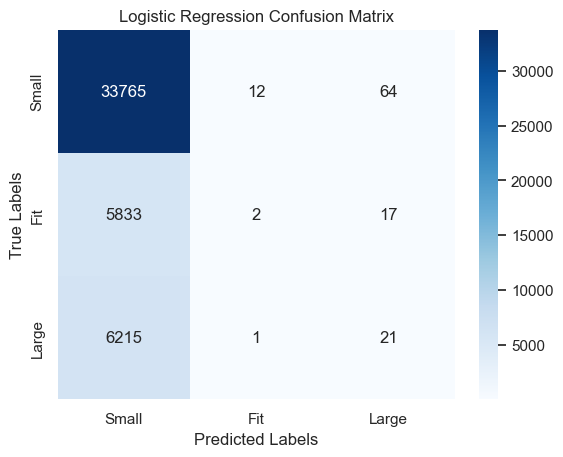

In [42]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.show()

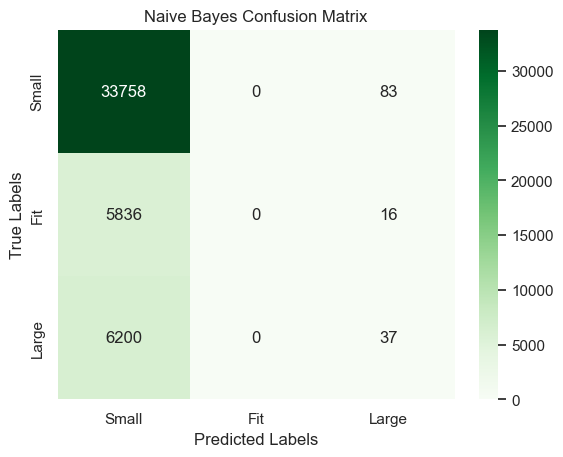

In [43]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.show()

## Model: Random Forest Classifier

**Why Choose Random Forest?** 

1. Handling Non-Linear Data: Random Forest can capture more complex, non-linear relationships between features compared to logistic regression and Naive Bayes.

2. Robustness to Overfitting: Due to its ensemble nature, Random Forest is generally more robust against overfitting, especially when dealing with high-dimensional data.

3. Feature Importance: Random Forest provides insights into feature importance, which can be valuable for understanding which factors most influence the prediction of 'fit'.

4. Handling Imbalanced Data: It can handle imbalanced data better than many algorithms, making it suitable for this dataset where the 'fit' class is more prevalent.

5. Flexibility: It works well with a mix of numerical and categorical features and doesn't require scaling of data.

* Accuracy: 70.58%
* Precision: 62.20%
* Recall: 70.58%
* F1-Score: 64.43%

**Performance** 
- The Random Forest model shows a slightly lower accuracy compared to the Logistic Regression and Naive Bayes models. However, it exhibits a higher precision and F1-score, indicating a better balance between precision and recall.

**Model Strengths** <br>
- The increased precision and F1-score suggest that Random Forest is better at handling the trade-off between incorrectly predicting a class and missing a correct prediction.
- The ability to capture more complex relationships in the data is likely contributing to these improved metrics.

**Model Limitations** <br>
- The slightly lower accuracy might be a result of the model's complexity and the inherent randomness in the ensemble method.
- There may still be room for improvement in terms of feature engineering or parameter tuning.

**Conclusion** <br>
The Random Forest model, while not substantially outperforming the simpler models in terms of accuracy, does offer a better balance between precision and recall. This indicates its potential for improved performance with further tuning and optimization. The model's ability to handle complex relationships in the data is a significant advantage, but its complexity and computational demands should be considered in further developments

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Results
accuracy_rf, precision_rf, recall_rf, f1_rf

print(f'accuracy: {accuracy_rf}, precision: {precision_rf}, recall: {recall_rf}, f1: {f1_rf}')

accuracy: 0.7058131939908556, precision: 0.6214561791221831, recall: 0.7058131939908556, f1: 0.6440418064562116


## Parameter Tuning for RFC

| n_estimators | max_depth | Accuracy  | Precision | Recall    | F1-Score  |
|--------------|-----------|-----------|-----------|-----------|-----------|
| 10           | None      | 0.6895    | 0.6120    | 0.6895    | 0.6379    |
| 30           | 2         | 0.7368    | 0.5429    | 0.7368    | 0.6251    |
| 50           | 5         | 0.7368    | 0.5429    | 0.7368    | 0.6251    |
| 70           | 8         | 0.7369    | 0.6321    | 0.7369    | 0.6255    |
| 80           | 10        | 0.7373    | 0.6427    | 0.7373    | 0.6267    |
| 100          | 11        | 0.7378    | 0.6970    | 0.7378    | 0.6282    |
| 120          | 12        | 0.7378    | 0.6785    | 0.7378    | 0.6289    |


In [51]:
ne = [10, 30, 50, 70, 80, 100, 120]
md = [None, 2, 5, 8, 10, 11, 12]
for i in range(7):
    rf_model = RandomForestClassifier(n_estimators=ne[i], max_depth=md[i])
    rf_model.fit(X_train, y_train)

    # Predicting and Evaluating
    y_pred_rf = rf_model.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

    # Results
    accuracy_rf, precision_rf, recall_rf, f1_rf
    
    print(f'n_estimators: {ne[i]}, max_depth: {md[i]}')
    print(f'accuracy: {accuracy_rf}, precision: {precision_rf}, recall: {recall_rf}, f1: {f1_rf}')

n_estimators: 10, max_depth: None
accuracy: 0.6894622251251905, precision: 0.611995718939632, recall: 0.6894622251251905, f1: 0.6378986417695981


/Users/siddhantbhagat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimators: 30, max_depth: 2
accuracy: 0.7367951230132811, precision: 0.542867053296156, recall: 0.7367951230132811, f1: 0.6251365473139974


/Users/siddhantbhagat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimators: 50, max_depth: 5
accuracy: 0.7367951230132811, precision: 0.542867053296156, recall: 0.7367951230132811, f1: 0.6251365473139974


/Users/siddhantbhagat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimators: 70, max_depth: 8
accuracy: 0.7368822120618332, precision: 0.6321250325256356, recall: 0.7368822120618332, f1: 0.6254637900052655


/Users/siddhantbhagat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n_estimators: 80, max_depth: 10
accuracy: 0.7372958850424559, precision: 0.642650527905046, recall: 0.7372958850424559, f1: 0.6266754045992962
n_estimators: 100, max_depth: 11
accuracy: 0.7377748748094927, precision: 0.69697909677088, recall: 0.7377748748094927, f1: 0.6282342432633378
n_estimators: 120, max_depth: 12
accuracy: 0.7377966470716307, precision: 0.6785271039142473, recall: 0.7377966470716307, f1: 0.6289236844671865


**Confusion Matrix Insights** <br>
- The confusion matrix reveals that, like the previous models, Random Forest performs well in predicting the 'fit' class but struggles with the 'small' and 'large' classes.
- There is a notable number of instances where 'small' and 'large' classes are misclassified as 'fit', indicating potential challenges in distinguishing between these classes.

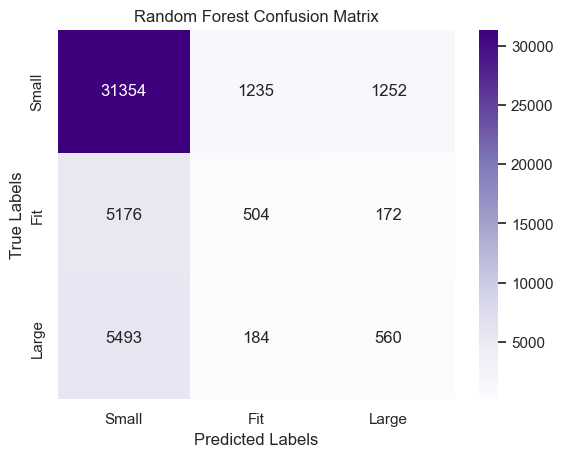

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Small', 'Fit', 'Large'])
plt.show()

## Comparison of models

| Model              | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| Logistic Regression| 73.56%     | 58.79%      | 73.57%   | 62.56%     |
| Naive Bayes        | 73.57%     | 58.00%      | 73.57%   | 62.62%     |
| Random Forest      | 70.58%     | 62.14%      | 70.58%   | 64.40%     |


**Random Forest:** <br>
* Optimization: Adjusting hyperparameters like the number of trees (n_estimators), tree depth (max_depth), and minimum samples per leaf can greatly influence performance. Using grid search or random search for hyperparameter tuning is beneficial.
* Issues: Scalability can be a concern due to its computational intensity, especially with large datasets. There's also a risk of overfitting if the trees are too deep.

**Other Models Considered** <br>
Models like Support Vector Machines (SVM), Gradient Boosting Machines (GBM), and neural networks were considered for their ability to capture complex, non-linear relationships.

**Unsuccessful Attempts** <br>
1. Early attempts might have included using simpler models without adequate feature preprocessing, leading to suboptimal performance.
2. Initial hyperparameter settings for complex models like Random Forest might not have been ideal, requiring iterative tuning.
3. Overfitting was a potential issue, especially in models like Random Forest, if the depth of the trees was not controlled properly.
